<a href="https://colab.research.google.com/github/ninkanatalia04/SistemKeamananCerdas/blob/main/program1_TAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode ini untuk Topik ini:
- Insider Threat Detection Using Transformers on User Activity Logs
Topik Riset:
"Deteksi Ancaman Internal Menggunakan Transformer untuk Menganalisis Log Aktivitas Pengguna"
Deskripsi:
Transformer digunakan untuk menganalisis aktivitas pengguna secara menyeluruh. Model ini dilatih untuk mendeteksi pola akses yang tidak biasa oleh pengguna internal, seperti akses data di luar jam kerja atau aktivitas mencurigakan lainnya, dengan mempelajari urutan akses file dan sistem.
Novelty: Sedang hingga tinggi. Insider threat sudah menjadi fokus penelitian dengan berbagai metode deteksi perilaku anomali. Namun, Transformer, dengan kemampuannya untuk menangkap perubahan perilaku yang halus dalam urutan log, menawarkan pendekatan baru yang dapat meningkatkan performa deteksi.
Dataset: CERT Insider Threat Dataset
Dataset ini berisi data aktivitas pengguna yang mencurigakan dan bisa digunakan untuk mendeteksi Insider Threat. Model Transformer bisa mengenali pola akses yang anomali berdasarkan log pengguna.
URL: CERT Insider Threat Dataset



# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

datanya pake email.csv sama dengan punya kalian

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
gdrive	sample_data


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/dataset")
!ls


email.csv


Memuat dataset:

Dataset dimuat ke dalam variabel data.

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/dataset/email.csv')



Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [ ]:
data.head(n=5)


,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [ ]:
# Sample 10% of your data
data  = data.sample(frac=0.1, random_state=42)

In [ ]:
# Threshold ukuran (25KB)
size_threshold = 25000

# Fungsi untuk menentukan aktivitas di luar jam kerja
def is_after_hours(date_str):
    hour = pd.to_datetime(date_str).hour  # Ekstrak jam dari 'date'
    return hour < 8 or hour > 18  # Jam kerja dianggap antara 08:00 - 18:00

# Membuat label (1 = mencurigakan, 0 = normal)
data['label'] = data.apply(lambda x:
    1 if x['size'] > size_threshold or is_after_hours(x['date']) else 0, axis=1)

# Cek hasil labeling
print(data[['user', 'date', 'size', 'label']].head())


            user                 date   size  label
1375085  HWH0646  09/08/2010 09:48:21  53433      1
1760687  EMW0772  11/18/2010 11:40:48  23746      0
489761   HAD0246  03/29/2010 14:40:35  20984      0
670295   ASB0796  04/30/2010 10:57:44  33996      1
2611719  HCW0419  05/12/2011 11:45:23  37670      1


In [ ]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


label
1    176616
0     86382
Name: count, dtype: int64
Jumlah kelas unik: 2


In [ ]:
data.shape


(262998, 12)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

In [ ]:
print(data.columns)


Index(['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size',
       'attachments', 'content', 'label'],
      dtype='object')


In [ ]:
print(data['label'].value_counts())


label
1    176616
0     86382
Name: count, dtype: int64


Jumlah kelas unik: 2


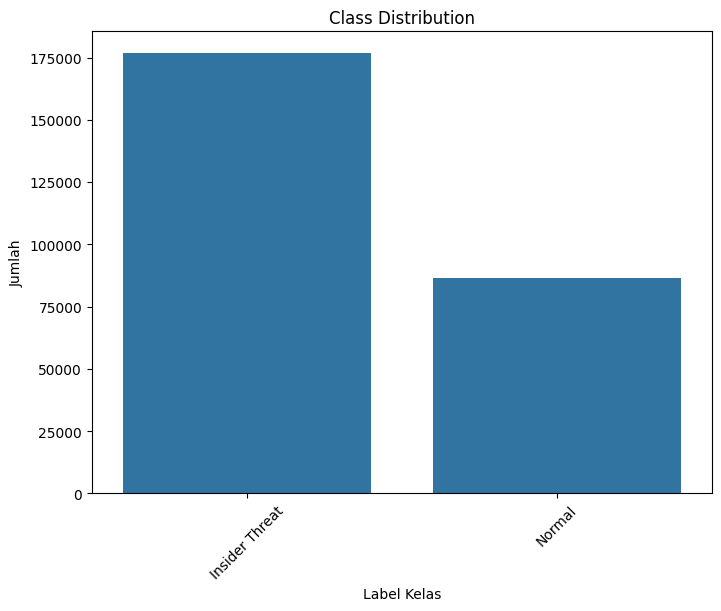

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan Anda telah menyiapkan DataFrame data
# Gantilah 'label' dengan nilai string sesuai label Anda
data['label'] = data['label'].replace({
    0: "Normal",
    1: "Insider Threat",
})

# Hitung jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualisasi distribusi kelas dengan nama
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
plt.show()


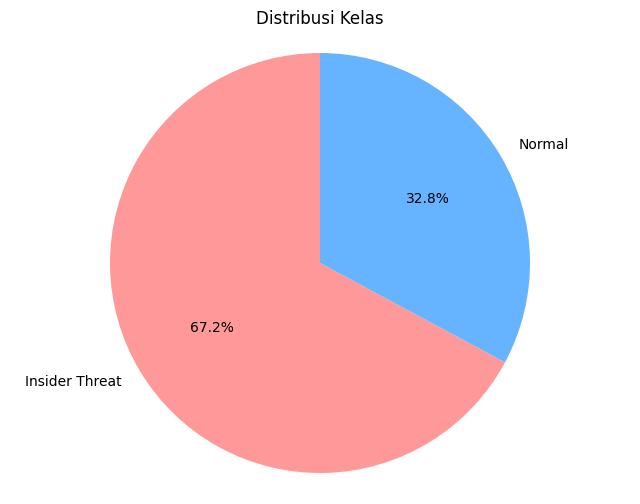

In [ ]:
# Hitung jumlah setiap kelas
kelas_count = data['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas_count, labels=kelas_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.title('Distribusi Kelas')
plt.show()


In [ ]:
# Kembali ke format numerik
data['label'] = data['label'].replace({
    "Normal": 0,
    "Insider Threat": 1
}).astype(int)  # Pastikan kolom menjadi integer

# Pastikan nilai kembali ke format numerik
print(data['label'].value_counts())


label
1    176616
0     86382
Name: count, dtype: int64


<ipython-input-14-104a01ba9104>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace({


# **DATA SPLITTING**

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('label', axis=1)  # Fitur (semua kolom kecuali 'Label')
y = data['label']                # Variabel target (kolom 'Label')

# Membagi data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.2, random_state=50)

# Menampilkan informasi tentang ukuran set
print(f'Ukuran set pelatihan: {X_train_bin.shape[0]}')
print(f'Ukuran set pengujian: {X_test_bin.shape[0]}')


Ukuran set pelatihan: 210398
Ukuran set pengujian: 52600


In [ ]:
# Verify the shapes of the resulting datasets
print(f"Training data shape: {X_train_bin.shape}")
print(f"Testing data shape: {X_test_bin.shape}")
print(f"Training labels shape: {y_train_bin.shape}")
print(f"Testing labels shape: {y_test_bin.shape}")


Training data shape: (210398, 11)
Testing data shape: (52600, 11)
Training labels shape: (210398,)
Testing labels shape: (52600,)


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


In [ ]:
!pip install transformers torch scikit-learn


# **3. TRANSFORMER "TAB"**


# **CLASSIFICATION Non-Tuning**

In [ ]:
!pip install transformers


In [ ]:
!pip install pytorch-tabular


Fold 1
Accuracy for fold 1: 97.24%
F1 Score for fold 1: 0.9726
Precision for fold 1: 0.9733
Recall for fold 1: 0.9724
ROC-AUC for fold 1: 0.9749
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8656
           1       0.99      0.97      0.98     17644

    accuracy                           0.97     26300
   macro avg       0.96      0.97      0.97     26300
weighted avg       0.97      0.97      0.97     26300



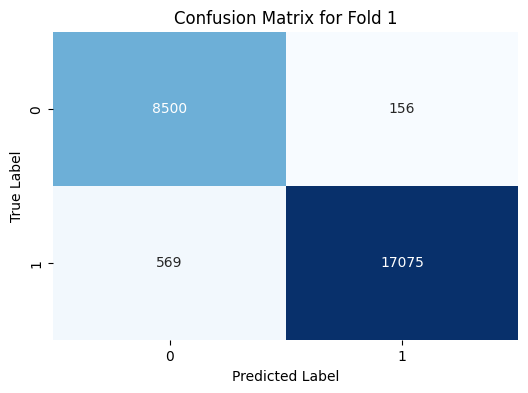

Fold 2
Accuracy for fold 2: 96.32%
F1 Score for fold 2: 0.9634
Precision for fold 2: 0.9644
Recall for fold 2: 0.9632
ROC-AUC for fold 2: 0.9655
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8568
           1       0.99      0.96      0.97     17732

    accuracy                           0.96     26300
   macro avg       0.95      0.97      0.96     26300
weighted avg       0.96      0.96      0.96     26300



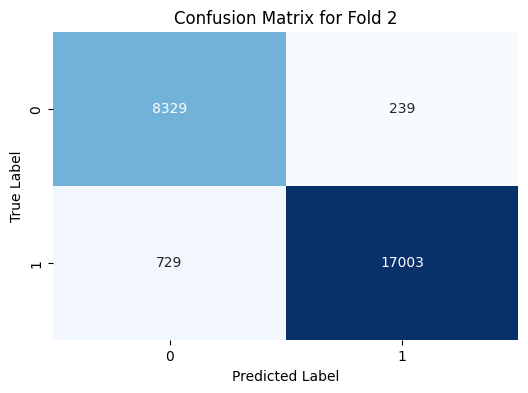

Fold 3
Accuracy for fold 3: 97.24%
F1 Score for fold 3: 0.9726
Precision for fold 3: 0.9738
Recall for fold 3: 0.9724
ROC-AUC for fold 3: 0.9771
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8688
           1       1.00      0.96      0.98     17612

    accuracy                           0.97     26300
   macro avg       0.96      0.98      0.97     26300
weighted avg       0.97      0.97      0.97     26300



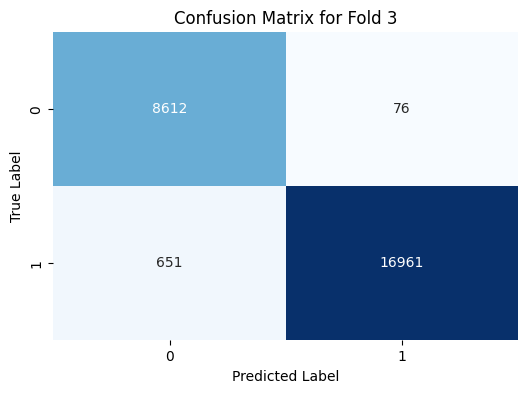

Fold 4
Accuracy for fold 4: 97.77%
F1 Score for fold 4: 0.9778
Precision for fold 4: 0.9781
Recall for fold 4: 0.9777
ROC-AUC for fold 4: 0.9784
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8517
           1       0.99      0.98      0.98     17783

    accuracy                           0.98     26300
   macro avg       0.97      0.98      0.97     26300
weighted avg       0.98      0.98      0.98     26300



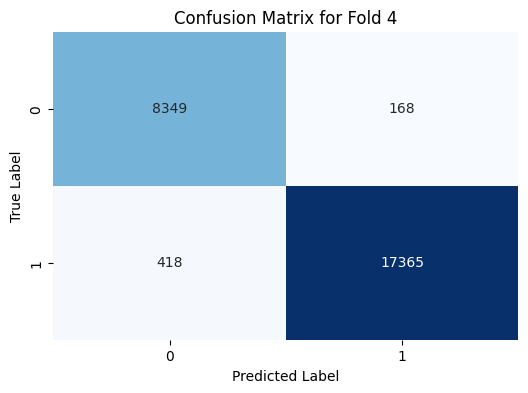

Fold 5
Accuracy for fold 5: 97.61%
F1 Score for fold 5: 0.9762
Precision for fold 5: 0.9765
Recall for fold 5: 0.9761
ROC-AUC for fold 5: 0.9766
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8688
           1       0.99      0.98      0.98     17612

    accuracy                           0.98     26300
   macro avg       0.97      0.98      0.97     26300
weighted avg       0.98      0.98      0.98     26300



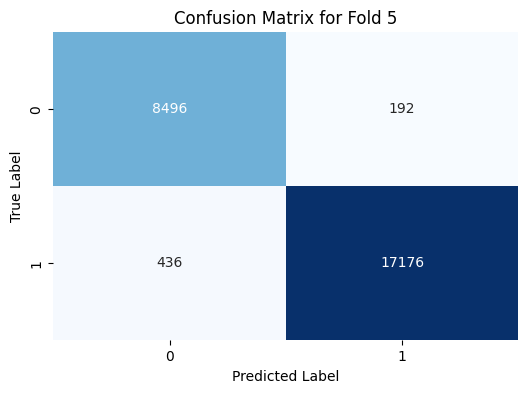

Fold 6
Accuracy for fold 6: 97.88%
F1 Score for fold 6: 0.9789
Precision for fold 6: 0.9795
Recall for fold 6: 0.9788
ROC-AUC for fold 6: 0.9815
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8639
           1       0.99      0.97      0.98     17661

    accuracy                           0.98     26300
   macro avg       0.97      0.98      0.98     26300
weighted avg       0.98      0.98      0.98     26300



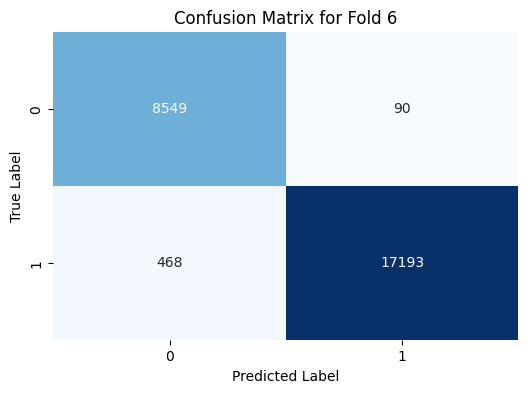

Fold 7
Accuracy for fold 7: 97.02%
F1 Score for fold 7: 0.9704
Precision for fold 7: 0.9723
Recall for fold 7: 0.9702
ROC-AUC for fold 7: 0.9767
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8616
           1       1.00      0.96      0.98     17684

    accuracy                           0.97     26300
   macro avg       0.96      0.98      0.97     26300
weighted avg       0.97      0.97      0.97     26300



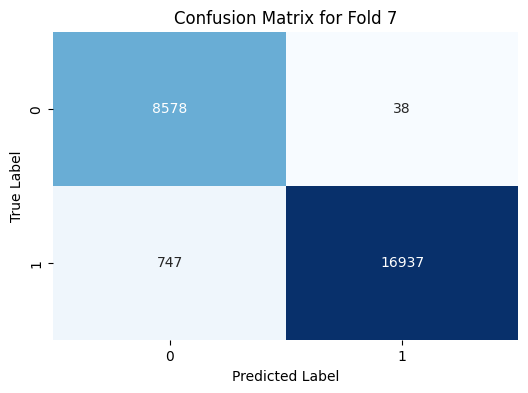

Fold 8
Accuracy for fold 8: 97.99%
F1 Score for fold 8: 0.9800
Precision for fold 8: 0.9805
Recall for fold 8: 0.9799
ROC-AUC for fold 8: 0.9823
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8683
           1       0.99      0.98      0.98     17617

    accuracy                           0.98     26300
   macro avg       0.97      0.98      0.98     26300
weighted avg       0.98      0.98      0.98     26300



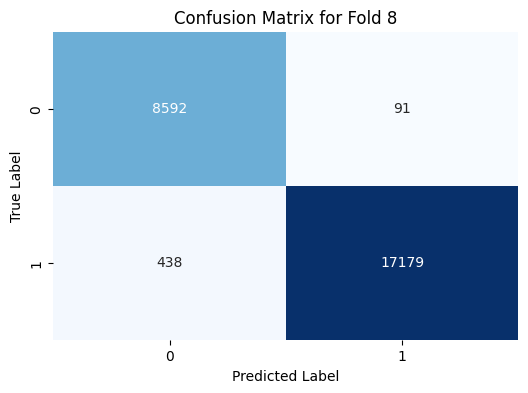

Fold 9
Accuracy for fold 9: 97.70%
F1 Score for fold 9: 0.9771
Precision for fold 9: 0.9777
Recall for fold 9: 0.9770
ROC-AUC for fold 9: 0.9794
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8679
           1       0.99      0.97      0.98     17620

    accuracy                           0.98     26299
   macro avg       0.97      0.98      0.97     26299
weighted avg       0.98      0.98      0.98     26299



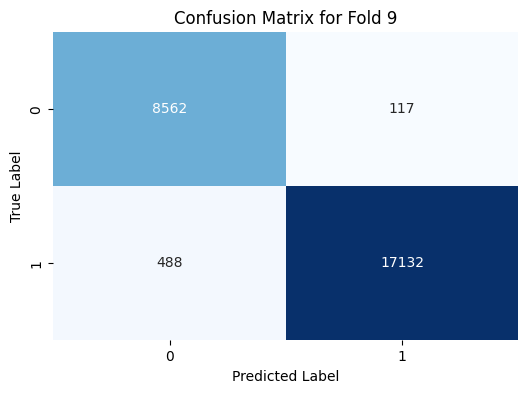

Fold 10
Accuracy for fold 10: 97.28%
F1 Score for fold 10: 0.9729
Precision for fold 10: 0.9731
Recall for fold 10: 0.9728
ROC-AUC for fold 10: 0.9726
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8648
           1       0.99      0.97      0.98     17651

    accuracy                           0.97     26299
   macro avg       0.97      0.97      0.97     26299
weighted avg       0.97      0.97      0.97     26299



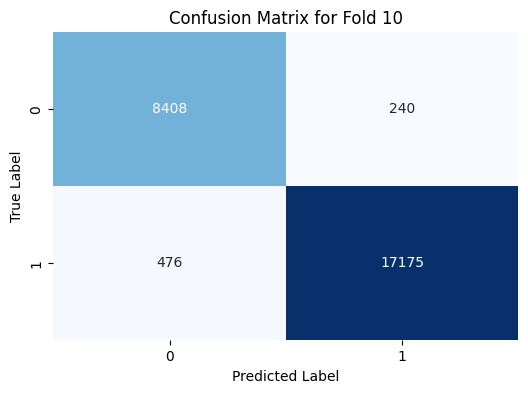

Average Accuracy: 97.40%
Average F1 Score: 0.9742
Average Precision: 0.9749
Average Recall: 0.9740
Average ROC-AUC: 0.9765


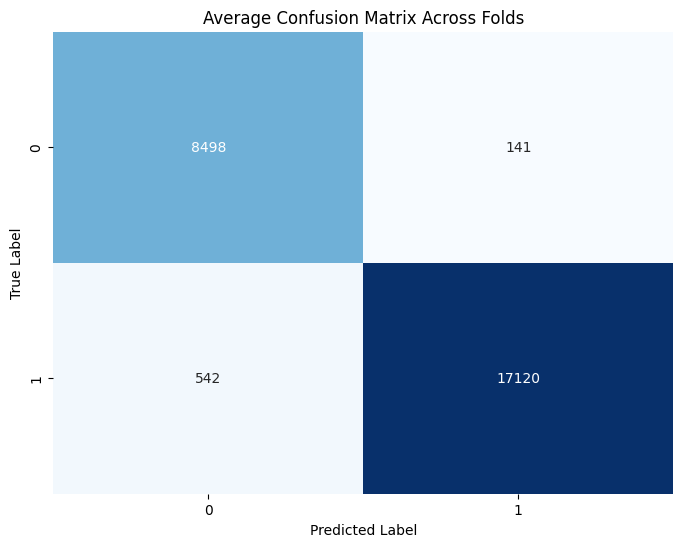

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming `X` (features) and `y` (labels) are loaded in pandas DataFrames

# Step 1: Identify categorical columns in X
categorical_cols = X.select_dtypes(include=['object']).columns

# Step 2: Encode categorical columns using LabelEncoder or get_dummies
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Step 3: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features
y_bin = y.values  # Ensure `y` is a numpy array or Series

# Define the TabTransformer model structure
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=2, d_model=64, nhead=4, num_layers=3):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embed tabular features
        transformer_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input
        x = x.unsqueeze(1)  # Add sequence length dimension
        x = self.transformer_encoder(x)  # Pass through the transformer
        x = x.mean(dim=1)  # Global Average Pooling
        x = self.fc(x)  # Classification layer
        return x

# KFold Cross Validation Setup
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores, all_precision, all_recall, all_roc_auc = [], [], [], [], []
conf_matrix_list = []

# KFold Cross-Validation Training Loop
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    # Split the data into training and validation sets
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the TabTransformer model
    model = TabTransformer(input_dim=X_train.shape[1], num_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training the model (default non-tuning with a single epoch)
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validate the model
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_val, y_pred.numpy())
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    precision = precision_score(y_val, y_pred.numpy(), average='weighted')
    recall = recall_score(y_val, y_pred.numpy(), average='weighted')
    roc_auc = roc_auc_score(y_val, y_pred.numpy())

    all_accuracy.append(accuracy)
    all_f1_scores.append(f1)
    all_precision.append(precision)
    all_recall.append(recall)
    all_roc_auc.append(roc_auc)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)

    # Print metrics for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(f'Precision for fold {fold + 1}: {precision:.4f}')
    print(f'Recall for fold {fold + 1}: {recall:.4f}')
    print(f'ROC-AUC for fold {fold + 1}: {roc_auc:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy())
    print(cls_report)

    # Plot confusion matrix for each fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')
print(f'Average Precision: {np.mean(all_precision):.4f}')
print(f'Average Recall: {np.mean(all_recall):.4f}')
print(f'Average ROC-AUC: {np.mean(all_roc_auc):.4f}')

# Plotting Average Confusion Matrix Across Folds
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()


# **Hyperparameter Tuning**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [ ]:
import itertools
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Identify categorical columns in X and encode them
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_bin = y.values

# Define the TabTransformer model structure
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=2, d_model=64, nhead=4, num_layers=3, dropout=0.1):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        transformer_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.fc(x)

# Define the hyperparameter grid
param_grid = {
    'lr': [0.001],
    'batch_size': [16],
    'nhead': [2],
    'num_layers': [2],
    'dropout': [0.2],
    'd_model': [64]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead, num_layers, dropout, d_model in itertools.product(
        param_grid['lr'],
        param_grid['batch_size'],
        param_grid['nhead'],
        param_grid['num_layers'],
        param_grid['dropout'],
        param_grid['d_model']
    ):

    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}, num_layers={num_layers}, dropout={dropout}, d_model={d_model}')

    # KFold Cross-Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=50)
    accuracies = []

    # Reinitialize model with new hyperparameters
    for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
        # Split data
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_bin[train_index], y_bin[val_index]

        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.LongTensor(y_train)
        X_val_tensor = torch.FloatTensor(X_val)
        y_val_tensor = torch.LongTensor(y_val)

        # Device setup
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Create DataLoader with the new batch size
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        model = TabTransformer(input_dim=X_train.shape[1], num_classes=2, d_model=d_model, nhead=nhead, num_layers=num_layers, dropout=dropout).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Training loop
        num_epochs = 10  # Set a fixed number of epochs
        model.train()
        for epoch in range(num_epochs):
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Validation
        model.eval()
        X_val_tensor = X_val_tensor.to(device)
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f'Average Accuracy for current params: {avg_accuracy * 100:.2f}%')

    # Save the best parameters if accuracy improves
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_params = {
            'lr': lr,
            'batch_size': batch_size,
            'nhead': nhead,
            'num_layers': num_layers,
            'dropout': dropout,
            'd_model': d_model
        }

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')

Training with lr=0.001, batch_size=16, nhead=2, num_layers=2, dropout=0.2, d_model=64


KeyboardInterrupt: 